# SD212: Graph mining

# Lab 1: Sampling

The objective of this lab is to explore differents ways to sample nodes in graphs. You're supposed to have done the lab on sparse matrices before.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset
from sknetwork.visualization import svg_graph

In [4]:
from sknetwork.linalg import normalize

## Graphs

We will sample nodes from [Openflights](https://openflights.org), the graph of daily flights between airports.

In [5]:
graph = load_netset("openflights")

Parsing files...
Done.


In [6]:
adjacency_weighted = graph.adjacency
names = graph.names
position = graph.position

In [7]:
# display graph (without edges)
image = svg_graph(adjacency_weighted, position, height=400, width=800, 
                  display_node_weight=True, display_edges=False)

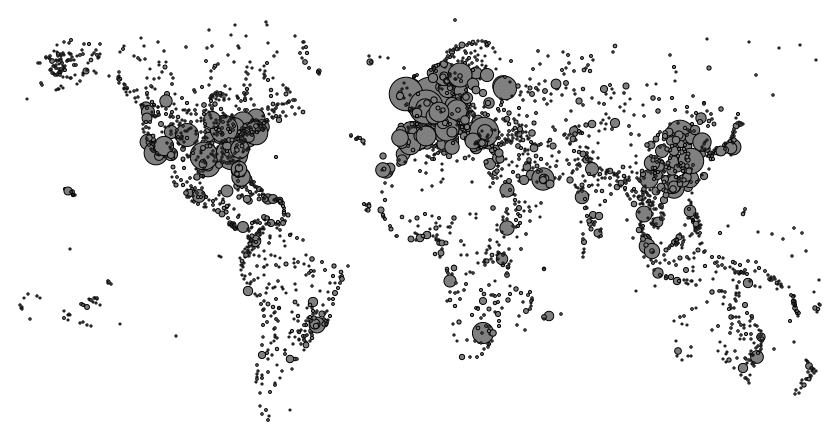

In [8]:
SVG(image)

In [9]:
# remove weights
adjacency = (adjacency_weighted > 0).astype(int)

## To do

* How many nodes are there in this graph?
* How many edges?
* What is the degree of Paris-Orly airport?

In [10]:
print("nodes number : "+str(len(names)))
print("edges number : "+str(adjacency_weighted.nnz//2))
ind = np.where(names == 'Paris-Orly Airport')[0][0]
print("degree of Orly : "+ str(adjacency.indptr[ind+1]-adjacency.indptr[ind]))

degrees = adjacency.dot(np.ones(adjacency.shape[0]))

nodes number : 3097
edges number : 18193
degree of Orly : 119


## To do

Sample 10 nodes at random and give their names, using the following methods:
* uniform node sampling
* uniform edge sampling
* uniform neighbor sampling

**Hint:** Use ``np.random.choice``.

In [11]:
def sample_nodes(adjacency, n_samples=10):
    '''Sample nodes uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    return np.random.randint(0, len(names), n_samples)

In [12]:
def sample_from_edges(adjacency, n_samples=10):
    '''Sample nodes from edges, selected uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    return np.random.choice(adjacency.indices, n_samples)

In [13]:
def sample_from_neighbors(adjacency, n_samples=10):
    '''Sample nodes from neighbors, selected uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    node1 = np.random.randint(0, len(names))
    deg = degrees[node1]
    ind_node2 = np.random.randint(0, int(deg))
    transition_matrix = normalize(adjacency)
    return adjacency.indices

## To do

Compute the average degree of a node sampled with each of the above sampling methods.

**Note:** You must give the exact value (i.e., don't sample nodes!)

In [14]:
adjacency.nnz/adjacency.shape[0]

11.748789150791088

In [15]:
sum([d**2 for d in degrees])/(adjacency.nnz)

64.27395151981531

## Weighted graphs

We now take the weights into account (here the daily number of flights between airports).

## To do

* How many daily flights are there?
* What are the top-3 airports in number of flights?

In [16]:
print(sum(adjacency_weighted.data))
degrees_bis = adjacency_weighted.dot(np.ones(adjacency.shape[0]))
ind = np.argsort(degrees_bis)[-3:]
print(names[ind])

65284
['Dublin Airport' 'Charles de Gaulle International Airport'
 'Amsterdam Airport Schiphol']


## To do

Sample 10 nodes at random and give their names, using the following methods:
* weighted edge sampling
* weighted neighbor sampling

In [17]:
def sample_from_edges_weighted(adjacency, n_samples = 10):
    '''Sample nodes from edges, selected in proportion to weights.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Weigthed adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    # to be modified
    # no loop allowed
    return None

In [18]:
def sample_from_neighbors_weighted(adjacency, n_samples = 10):
    '''Sample nodes from neighbors, selected uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Weigthed adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    # to be modified
    # no loop allowed
    return None

## To do

Compute the average weight (i.e., average number of daily flights) of a node sampled from each of the above sampling methods.

**Note:** Again, you must give the exact values.

In [19]:
sum(adjacency_weighted.data)/adjacency.shape[0]

21.079754601226995

In [20]:
sum(np.power(degrees_bis, 2))/(sum(adjacency_weighted.data))

118.4742050119478